In [3]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:

# Cargar el dataset
import os
for dirname, _, filenames in os.walk('../../data/input/recomendation'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../data/input/recomendation\Air Conditioners.csv
../../data/input/recomendation\All Appliances.csv
../../data/input/recomendation\All Books.csv
../../data/input/recomendation\All Car and Motorbike Products.csv
../../data/input/recomendation\All Electronics.csv
../../data/input/recomendation\All English.csv
../../data/input/recomendation\All Exercise and Fitness.csv
../../data/input/recomendation\All Grocery and Gourmet Foods.csv
../../data/input/recomendation\All Hindi.csv
../../data/input/recomendation\All Home and Kitchen.csv
../../data/input/recomendation\All Movies and TV Shows.csv
../../data/input/recomendation\All Music.csv
../../data/input/recomendation\All Pet Supplies.csv
../../data/input/recomendation\All Sports Fitness and Outdoors.csv
../../data/input/recomendation\All Video Games.csv
../../data/input/recomendation\Amazon Fashion.csv
../../data/input/recomendation\Amazon Pharmacy.csv
../../data/input/recomendation\Amazon-Products.csv
../../data/input/recomendation\archiv

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from random import randint,uniform
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process

C:\Universidad\rna_trabajo3_aplicaciones_redes_neuronales\.venv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [18]:
df=pd.read_csv("../../data/input/recomendation/Amazon-Products.csv")
#Eliminar primera columna 'Unnamed'
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [19]:
df.shape

(551585, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 37.9+ MB


In [21]:
df.drop(columns=['image', 'link'],inplace=True)

In [22]:
# Total percentage of null values
print(f"Total null value in product table:\n{df.isnull().sum()/len(df)}")

Total null value in product table:
name              0.000000
main_category     0.000000
sub_category      0.000000
ratings           0.318707
no_of_ratings     0.318707
discount_price    0.110886
actual_price      0.032294
dtype: float64


In [23]:
df['main_category'].value_counts()

main_category
accessories                116141
men's clothing              76656
women's clothing            76512
tv, audio & cameras         68659
men's shoes                 57456
appliances                  33096
stores                      32903
home & kitchen              14568
kids' fashion               13488
sports & fitness            12648
bags & luggage              10416
beauty & health             10122
car & motorbike              7080
toys & baby products         6216
women's shoes                5472
industrial supplies          4104
grocery & gourmet foods      3312
pet supplies                 1632
music                        1080
home, kitchen, pets            24
Name: count, dtype: int64

In [25]:
# unique values of ratings column
print(f"Unique values of ratings:\n{df['ratings'].unique()}")
# unique values of no_of_ratings column
print(f"Unique values of no_of_ratings:\n{df['no_of_ratings'].unique()}")

Unique values of ratings:
['4.2' '4.0' '4.1' '4.3' '3.9' '3.8' '3.5' nan '4.6' '3.3' '3.4' '3.7'
 '2.9' '5.0' '4.4' '3.6' '2.7' '4.5' '3.0' '3.1' '3.2' '4.8' '4.7' '2.5'
 '1.0' '2.6' '2.8' '2.3' '1.7' 'Get' '1.8' '2.4' '4.9' '2.2' '1.6' '1.9'
 '2.0' '1.4' '2.1' 'FREE' '1.2' '1.3' '1.5' '₹68.99' '₹65' '1.1' '₹70'
 '₹100' '₹99' '₹2.99']
Unique values of no_of_ratings:
['2,255' '2,948' '1,206' ... '3,329' '7,141' '4,406']


In [26]:
# no_of_ratings column
df['no_of_ratings'] = df['no_of_ratings'].str.replace(",","")
# converting to interger column
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors="coerce", downcast="integer")

In [27]:
# ratings column
# Identifying string in column based on regex and replacing with default ratings -> 3.0
df = df.replace({
    'ratings': {r'₹\w+[.]\w+':'3.0', r'FREE':'3.0', r'Get':'3.0', r'₹\w+':'3.0'},
}, regex=True)
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce', downcast='integer')

# convert price and discount column to integer
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace("₹","").str.replace(",",""), errors='coerce', downcast='integer')
df['discount_price'] = pd.to_numeric(df['discount_price'].str.replace("₹","").str.replace(",",""), errors='coerce', downcast='integer')

In [28]:
# Handling Null Values
df['ratings'].fillna(round(df['ratings'].mean(),1), inplace=True) # replacing null values with mean
df['no_of_ratings'].fillna(round(df['no_of_ratings'].mean()), inplace=True) # replacing null values with mean

C:\Users\David\AppData\Local\Temp\ipykernel_8852\1477565086.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ratings'].fillna(round(df['ratings'].mean(),1), inplace=True) # replacing null values with mean
C:\Users\David\AppData\Local\Temp\ipykernel_8852\1477565086.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [29]:
# Handling Null Values in price and discount column
# Filling the null values based on sub category, grouping the rows by sub category,
# find the mean -> replace the NULL values

mean_actual_price_by_sub_category = round(df.groupby('sub_category')[['actual_price','discount_price']].mean()).reset_index()

# Creating dictionary of sub_category with respective mean
# For eg {"Air Conditioners ": 54815.0, "All Applicances": 7017..0 ..........}
mean_actual_price_dict = mean_actual_price_by_sub_category.set_index('sub_category')['actual_price'].to_dict()
mean_discount_price_dict = mean_actual_price_by_sub_category.set_index('sub_category')['discount_price'].to_dict()

# replacing the null values with the mean
df['actual_price'] = df.apply(lambda x: x['actual_price'] if pd.notna(x['actual_price']) else mean_actual_price_dict.get(x['sub_category']), axis=1)
df['discount_price'] = df.apply(lambda x: x['discount_price'] if pd.notna(x['discount_price']) else mean_discount_price_dict.get(x['sub_category']), axis=1)

# Drop Duplicates
df = df.drop_duplicates()

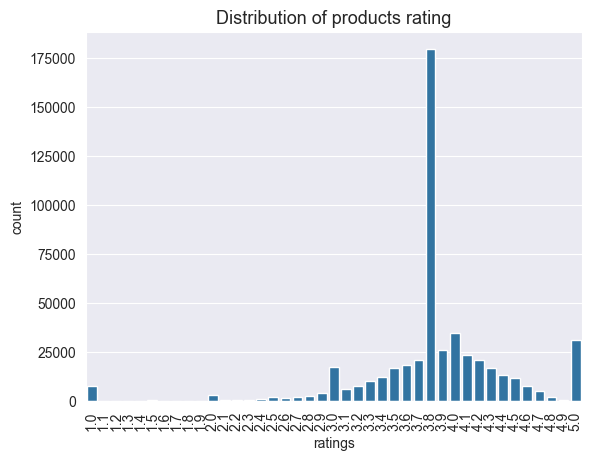

In [32]:
#Distribution of product by ratings
sns.countplot(x='ratings',data=df)
plt.title("Distribution of df rating",fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [33]:
df['productId'] = pd.factorize(df['name'])[0] + 1 # + 1 to start from 1, not 0

print(f"Unique Count of product name: {df['name'].nunique()}")
print(f"Unique Count of product Id: {df['productId'].nunique()}")

Unique Count of product name: 396210
Unique Count of product Id: 396210


In [46]:
#Analisis preliminar de dataset actual
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 515691 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  515691 non-null  object 
 1   main_category         515691 non-null  object 
 2   sub_category          515691 non-null  object 
 3   ratings               515691 non-null  float64
 4   no_of_ratings         515691 non-null  float64
 5   discount_price        515691 non-null  float64
 6   actual_price          515691 non-null  float64
 7   productId             515691 non-null  int64  
 8   random_number_userId  515691 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 55.5+ MB
None
             ratings  no_of_ratings  discount_price  actual_price  \
count  515691.000000  515691.000000    5.156910e+05  5.156910e+05   
mean        3.811343     834.529746    2.653901e+03  2.396413e+04   
std         0.634186    7163.421061    9.239982e

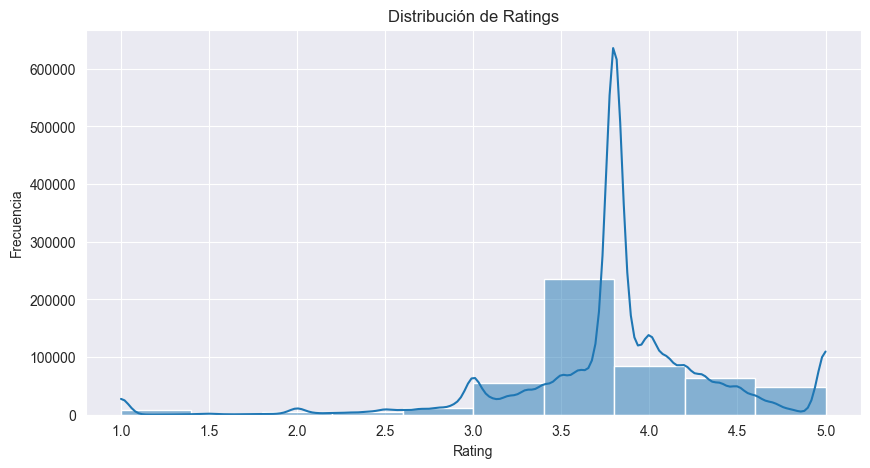

In [47]:
#distribución de ratings
plt.figure(figsize=(10,5))
sns.histplot(df['ratings'], bins=10, kde=True)
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_8852\794072994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


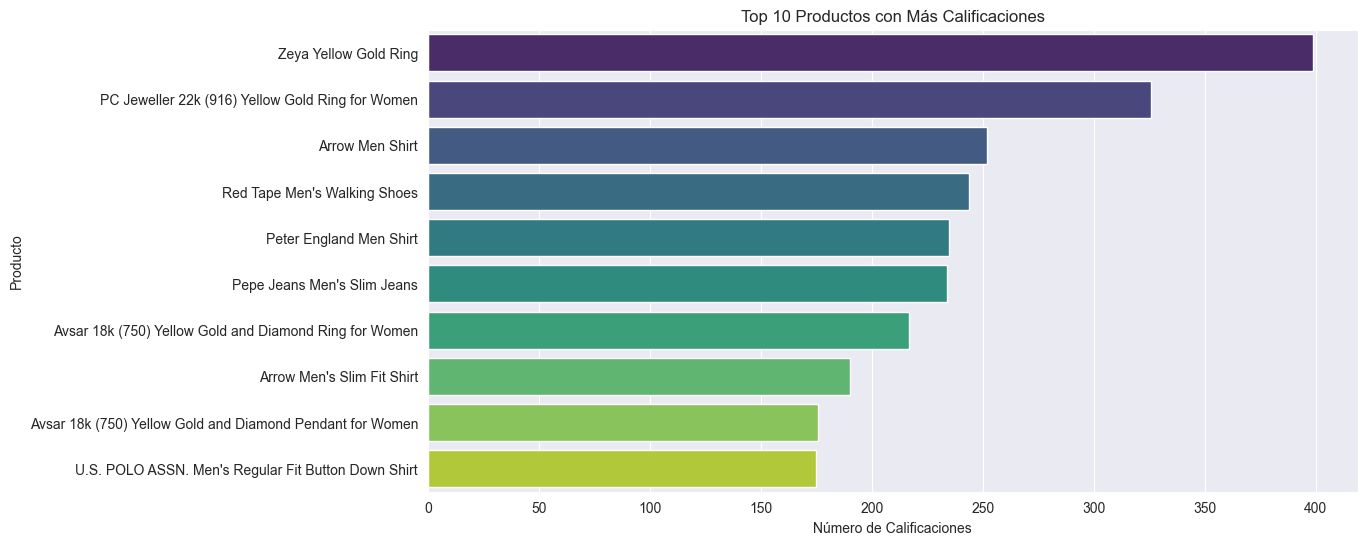

In [48]:
#Productos con más calificaciones
top_products = df.groupby('name')['ratings'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Productos con Más Calificaciones")
plt.xlabel("Número de Calificaciones")
plt.ylabel("Producto")
plt.show()


In [49]:
DATA_PATH = os.path.join('..', '..', 'data', 'input', 'recomendation')
df.to_csv(os.path.join(DATA_PATH, 'data_processed.csv'), index=False)